<a href="https://colab.research.google.com/github/hemanthmeruga/IEApp/blob/master/Introduction_to_Neural_Networks_and_Deep_Learning_R7_P2_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import h5py
h5f = h5py.File('/gdrive/My Drive/SVHN_single_grey1.h5', 'r')

In [0]:

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

X_train = X_train[1000:31000]
y_train = y_train[1000:31000]
X_test = X_test[1000:7000]
y_test = y_test[1000:7000]
# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
#print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (30000, 32, 32) (30000,)
Test set (6000, 32, 32) (6000,)


In [0]:
print("training data points: {}".format(len(y_train)))
print("testing data points: {}".format(len(y_test)))

training data points: 30000
testing data points: 6000


In [0]:
# Changing dimensions to N x D = 28x28
N = 30000
x_tr = []
for i in range(N):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(6000):
    x_te.append(X_test[i,:].flatten())

In [0]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

In [0]:
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_tr,y_train)
score = model.score(x_te,y_test)
print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=5, accuracy=46.68%


In [0]:
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(x_tr,y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(x_te,y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1, accuracy=44.47%
k=3, accuracy=43.85%
k=5, accuracy=46.68%
k=7, accuracy=48.45%
k=9, accuracy=49.02%
k=11, accuracy=49.17%
k=13, accuracy=49.73%
k=15, accuracy=49.88%
k=17, accuracy=50.08%
k=19, accuracy=50.43%
k=21, accuracy=50.33%
k=23, accuracy=50.90%
k=25, accuracy=51.32%
k=27, accuracy=51.38%
k=29, accuracy=51.42%
k=29 achieved highest accuracy of 51.42% on validation data


In [0]:
# re-train our classifier using the best k=29 and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=29)
model.fit(x_tr,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [0]:
predictions = model.predict(x_te)
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.42      0.67      0.52       589
           1       0.44      0.74      0.55       596
           2       0.65      0.52      0.58       596
           3       0.45      0.43      0.44       565
           4       0.64      0.66      0.65       620
           5       0.48      0.38      0.43       625
           6       0.49      0.39      0.43       616
           7       0.71      0.56      0.62       568
           8       0.46      0.37      0.41       629
           9       0.54      0.43      0.48       596

    accuracy                           0.51      6000
   macro avg       0.53      0.52      0.51      6000
weighted avg       0.53      0.51      0.51      6000



The below is for Deep Neural Networks

In [0]:
#tf.enable_eager_execution()

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tf.set_random_seed(42)

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

#X_train = X_train[0:999]
#y_train = y_train[0:999]
#X_test = X_test[0:299]
#y_test = y_test[0:299]

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(20, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 30)                30750     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

In [0]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=20,
          batch_size=30)

W0619 09:14:37.331977 139978891274112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30000 samples, validate on 6000 samples
Epoch 1/20
30000/30000 [==============================] - 5s 178us/sample - loss: 2.3033 - acc: 0.0999 - val_loss: 2.3024 - val_acc: 0.0957
Epoch 2/20
30000/30000 [==============================] - 4s 145us/sample - loss: 2.3024 - acc: 0.1028 - val_loss: 2.3018 - val_acc: 0.1055
Epoch 3/20
30000/30000 [==============================] - 4s 136us/sample - loss: 2.3016 - acc: 0.1105 - val_loss: 2.3012 - val_acc: 0.1013
Epoch 4/20
30000/30000 [==============================] - 4s 136us/sample - loss: 2.3008 - acc: 0.1136 - val_loss: 2.2998 - val_acc: 0.1133
Epoch 5/20
30000/30000 [==============================] - 4s 135us/sample - loss: 2.2996 - acc: 0.1168 - val_loss: 2.2988 - val_acc: 0.1185
Epoch 6/20
30000/30000 [==============================] - 4s 135us/sample - loss: 2.2976 - acc: 0.1269 - val_loss: 2.2961 - val_acc: 0.1168
Epoch 7/20
30000/30000 [==============================] - 4s 133us/sample - loss: 2.2940 - acc: 0.1367 - val_lo

In [0]:
model.save('svhn_dnn_v1.h5')

In [0]:
X_test[101:105].shape

(4, 32, 32)

In [0]:
#Actual Label for the first example in test dataset
print(testY[101:105])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
#Model prediction
prediction = model.predict(X_test[101:105])

#Print prediction
print(prediction[0:4])

[[0.06150101 0.128013   0.08303941 0.1288486  0.05185302 0.15447025
  0.03991526 0.063457   0.08346099 0.2054415 ]
 [0.21365422 0.00900275 0.00490102 0.01636662 0.21730791 0.08627904
  0.24728988 0.00309377 0.18352835 0.01857652]
 [0.06810776 0.09278257 0.04671377 0.09205139 0.05642561 0.16743962
  0.044631   0.03330154 0.08232488 0.31622186]
 [0.01758985 0.2002753  0.22190711 0.18449081 0.01437578 0.05272339
  0.01065123 0.22175662 0.0306841  0.04554583]]


In [0]:
import numpy as np

#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0:4])

#Print the number
print(predicted_num)

29


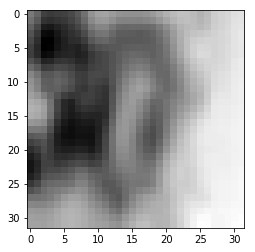

In [0]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(X_test[102],cmap='gray')